# Bitcoin Price Prediction using Random Forest

This notebook demonstrates how to use a Random Forest model to predict the closing price of Bitcoin using historical data.

In [13]:
import pandas as pd
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt


### Step 1: Load and Explore the Dataset

In [14]:

# Load the dataset
# file_path = '../bitcoin_price_sentiment_addmean.csv'
file_path = 'https://raw.githubusercontent.com/lcxWEB/bitflow/feature-20241002-bitcoinprediction/bitcoin_prediction/bitcoin_price_sentiment_addmean.csv'
bitcoin_data = pd.read_csv(file_path)

# Automatically infer and convert the 'date' column to datetime
bitcoin_data['date'] = pd.to_datetime(bitcoin_data['date'], dayfirst=False, errors='coerce')

# Drop rows with NaT values in 'date' (if any) due to incorrect parsing
bitcoin_data = bitcoin_data.dropna(subset=['date'])

# Display the first few rows of the dataset
bitcoin_data.head()


,date,Open,High,Low,Close,Volume,sentiment_scores
0,2012-01-01,4.84,4.84,4.84,4.84,0.0,0.201493
1,2012-01-02,5.00,5.00,5.00,5.00,0.0,0.201493
2,2012-01-03,5.29,5.29,5.29,5.29,0.0,0.201493
3,2012-01-04,5.57,5.57,5.57,5.57,0.0,0.201493
4,2012-01-05,6.42,6.42,6.42,6.42,0.0,0.201493


### Step 2: Select and Limit the Data

In [15]:

# Limit to the first 5000 rows
# bitcoin_data = bitcoin_data.head(5000)

# Define features and target variable
data = bitcoin_data.drop(['date'], axis=1)
x = data[['Open', 'High', 'Low', 'Volume', 'sentiment_scores']]
y = data['Close']


### Step 3: Split the Data into Training and Test Sets

In [16]:

# Split the limited data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 将 DataFrame 转换为 numpy 数组，去除特征名依赖
x_train = x_train.values  # 将 x_train 转换为 numpy 数组
x_test = x_test.values    # 将 x_test 转换为 numpy 数组

### Step 4: Train the Random Forest Model

In [17]:

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

### Step 5: Make Predictions and Evaluate the Model

In [18]:
# Start the timer
start_time = time.time()

# Predict on the test set
y_pred = rf_model.predict(x_test)

# End the timer and calculate runtime
end_time = time.time()
runtime = end_time - start_time
print(f"Runtime: {runtime} seconds")

# Calculate mean absolute error for the limited data
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error : {mae:.2f}')

# Assuming y_test contains your actual values, calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape * 100:.2f}%")


Runtime: 0.03530097007751465 seconds
Mean Absolute Error : 12.37
MAPE: 0.14%


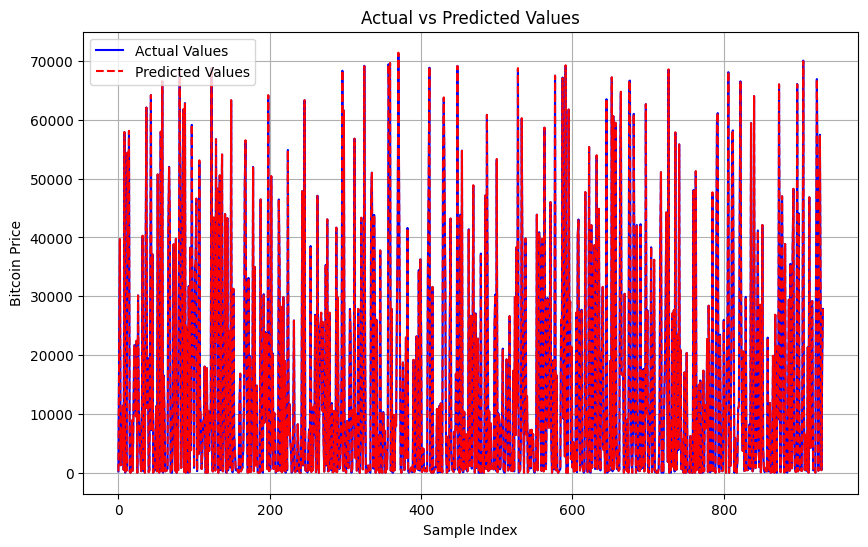

In [19]:

# Plot actual vs predicted values for the limited test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', color='blue', linestyle='-')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.grid(True)
plt.show()

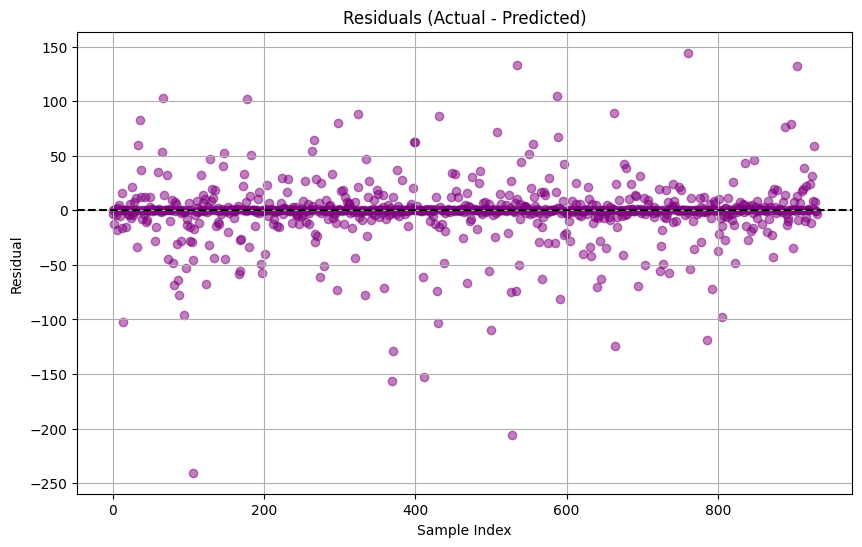

In [20]:
# Calculate residuals
residuals = y_test.values - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, color='purple', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals (Actual - Predicted)')
plt.xlabel('Sample Index')
plt.ylabel('Residual')
plt.grid(True)
plt.show()

### Step 6: Calculate Percentage Error

In [21]:

# Calculate the mean actual value of the 'Close' prices in the test set to assess the relative percentage error
mean_actual_value = y_test.mean()

# Calculate the percentage error based on the mean absolute error
percentage_error = (mae / mean_actual_value) * 100

print(f'Mean Actual Value: {mean_actual_value:.2f}')
print(f'Percentage Error: {percentage_error:.3f}%')


Mean Actual Value: 14613.69
Percentage Error: 0.085%


In [ ]:
# Dunmp scaler and model
import joblib
# joblib.dump(rf_scaler, 'rf_scaler.pkl')
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']